In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import pandas as pd
import scipy

In [4]:
import sklearn.metrics
import mir_eval

In [5]:
import cPickle as pickle

In [8]:
np.set_printoptions(precision=3)
seaborn.set(style='darkgrid')

In [9]:
def plot_curve(file_name='', intervals=None, labels=None, scores=None, norm=None):
    
    label_agreement = np.zeros((len(labels), len(labels)), dtype=bool)
    
    for i in range(len(labels)):
        for j in range(i, len(labels)):
            label_agreement[i, j] = (labels[i] == labels[j])
            label_agreement[j, i] = label_agreement[i, j]
    
    time_norm = 1
    
    durations = np.diff(intervals, axis=1).ravel()
    
    if norm == 'min':
        time_norm = np.minimum.outer(durations, durations)
        
    elif norm == 'max':
        time_norm = np.maximum.outer(durations, durations)
        
    elif norm == 'hmean':
        time_norm = 2./np.add.outer(durations, durations)
        time_norm *= np.multiply.outer(durations, durations)
    
    # TODO: have the label agreement index out nan-valued scores
    
    scores = scores / time_norm
    
    label_agreement[np.tril_indices_from(label_agreement, k=0)] = False
    
    label_agreement[~np.isfinite(scores)] = False
    
    label_disagreement = ~label_agreement
    
    label_disagreement[np.tril_indices_from(label_disagreement, k=0)] = False
    
    label_disagreement[~np.isfinite(scores)] = False
    
    tp_scores = scores[label_agreement]
    fp_scores = scores[label_disagreement]
    
    num_pos = np.sum(label_agreement)
    num_neg = np.sum(label_disagreement)
    
    y_true = np.concatenate([np.zeros(len(tp_scores)), np.ones(len(fp_scores))])
    y_score = np.concatenate([tp_scores, fp_scores])
    
    fpr, tpr, thr = sklearn.metrics.roc_curve(y_true, y_score)
    
    tp = num_pos * tpr
    fp = num_neg * fpr
    
    precision = tp / (tp + fp)
    recall = tpr
    
    fmeasure = np.asarray([mir_eval.util.f_measure(p, r) for p, r in zip(precision, recall)])
    
    k = np.argmax(fmeasure)
    thr_opt = thr[k]
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1,3,1)
    plt.plot([0, 1], [0, 1], linestyle='--', alpha=0.5)
    
    plt.plot(fpr, tpr)
    plt.plot(fpr[k], tpr[k], color='r', marker='*', markersize=10, alpha=0.5)
   
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(file_name)
    
    plt.subplot(1,3,2)
    plt.plot(recall, precision)
    plt.plot(recall[k], precision[k], marker='*', markersize=10, alpha=0.5, color='r')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('norm={}'.format(norm))
   
    plt.subplot(1,3,3)
    plt.plot(thr, fmeasure)
    k = np.argmax(fmeasure)
    plt.plot(thr[k], fmeasure[k], marker='*', markersize=10, alpha=0.5, color='r')
   
    plt.xlabel(r'$\theta$')
    plt.ylabel('$F_1$')
    plt.title(r'({:.3f}, {:.3f})'.format(thr[k], fmeasure[k]))
    plt.tight_layout()
    
    return thr[k], fmeasure[k]

In [13]:
vars().update(pickle.load(open('../data/scores_datasetESALAMI_levelElarge_scale_distEL1.pk', 'r')))

In [14]:
whos

Variable      Type        Data/Info
-----------------------------------
dist          str         L1
file_scores   list        n=769
k             int         590
level         str         large_scale
mir_eval      module      <module 'mir_eval' from '<...>l/mir_eval/__init__.pyc'>
norm          str         hmean
np            module      <module 'numpy' from '/us<...>ages/numpy/__init__.pyc'>
pd            module      <module 'pandas' from '/u<...>ges/pandas/__init__.pyc'>
pickle        module      <module 'cPickle' (built-in)>
plot_curve    function    <function plot_curve at 0x7f6c80fff2a8>
plt           module      <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
scipy         module      <module 'scipy' from '/us<...>ages/scipy/__init__.pyc'>
seaborn       module      <module 'seaborn' from '/<...>es/seaborn/__init__.pyc'>
sklearn       module      <module 'sklearn' from '/<...>rn/sklearn/__init__.pyc'>


In [12]:
file_scores[3]

{'file': 'SALAMI_564.mp3', 'intervals': array([[   0.   ,    0.348],
        [   0.348,    6.409],
        [   6.409,   12.417],
        [  12.417,   18.385],
        [  18.385,   24.474],
        [  24.474,   30.617],
        [  30.617,   36.577],
        [  36.577,   41.197],
        [  41.197,   45.741],
        [  45.741,   50.229],
        [  50.229,   53.316],
        [  53.316,   59.383],
        [  59.383,   65.492],
        [  65.492,   71.433],
        [  71.433,   77.538],
        [  77.538,   83.509],
        [  83.509,   89.618],
        [  89.618,   94.109],
        [  94.109,   98.677],
        [  98.677,  103.126],
        [ 103.126,  106.304],
        [ 106.304,  112.287],
        [ 112.287,  118.39 ],
        [ 118.39 ,  124.439],
        [ 124.439,  130.408],
        [ 130.408,  136.587],
        [ 136.587,  142.587],
        [ 142.587,  148.624],
        [ 148.624,  154.712],
        [ 154.712,  160.671],
        [ 160.671,  166.824],
        [ 166.824,  172.761],
 

(48.338472775529652, 0.99834034345574307)
(35.886022847460765, 1.0)
(6.8633356205494316, 0.99839546174470239)
(21.3746792340051, 1.0)


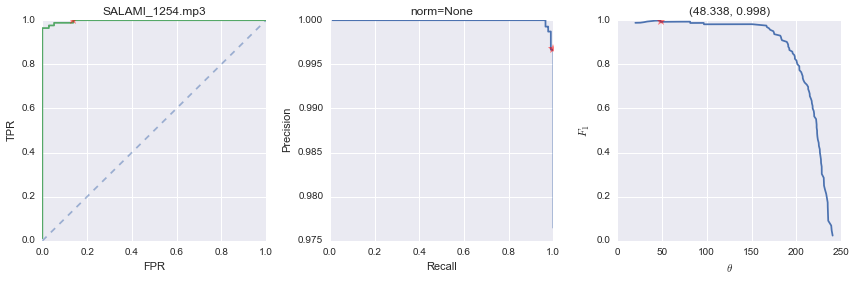

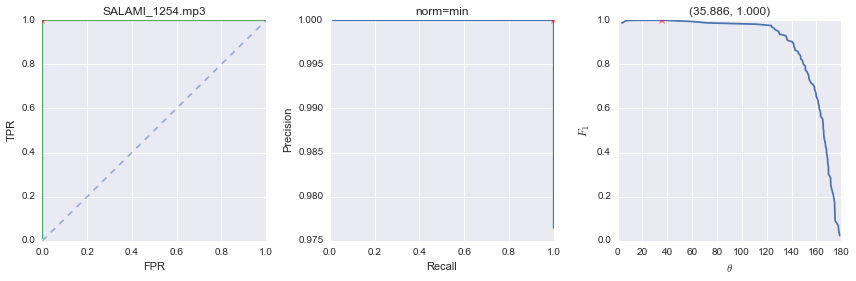

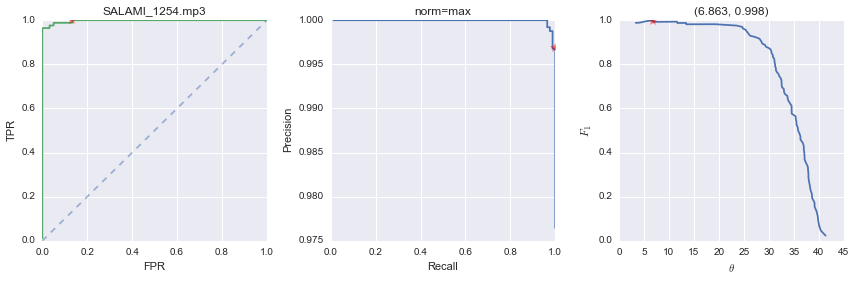

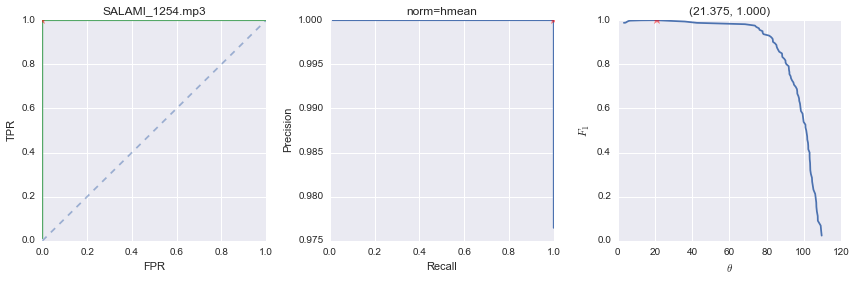

In [9]:
k = 590
for norm in [None, 'min', 'max', 'hmean']:
    print plot_curve(norm=norm, **file_scores[k])